In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy

def plot_roc_curves(y, y_proba):
    fpr, tpr, roc_auc = dict(), dict(), dict()
    all_y_train_i = np.empty(shape=(0, len(y)), dtype=int)
    all_y_predict_proba = np.empty(shape=(0, len(y)), dtype=int)

    # http://benalexkeen.com/scoring-classifier-models-using-scikit-learn/
    for i in range(10):
        y_train_i = list(map(lambda x: 1 if x == i else 0, y))
        all_y_train_i = np.append(all_y_train_i, [copy.deepcopy(y_train_i)], axis=0)
        all_y_predict_proba = np.append(all_y_predict_proba, [y_proba[:, i]], axis=0)
        fpr[i], tpr[i], _ = roc_curve(y_train_i, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    colors = ['darkorange', 'forestgreen', 'royalblue', 'firebrick', 'gold', 'deepskyblue', 'darkviolet', 'peru', 'deeppink', 'yellowgreen']
    for lbl in range(10):
        plt.plot(fpr[lbl], tpr[lbl], color=colors[lbl], linewidth=2, label=f'Label {lbl} (area = {round(roc_auc[lbl], 2)})')
    plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves per label')
    plt.legend(loc="lower right")
    plt.show()

In [2]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')

training_dataSet = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10.csv')
testing_dataSet = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10.csv')

training_dataSet_4000 = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10_4000.csv')
testing_dataSet_4000 = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10_4000.csv')

training_dataSet_9000 = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10_9000.csv')
testing_dataSet_9000 = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10_9000.csv')

training_dataSet['label'] = training_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet['label'] = testing_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

training_dataSet_4000['label'] = training_dataSet_4000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet_4000['label'] = testing_dataSet_4000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

training_dataSet_9000['label'] = training_dataSet_9000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet_9000['label'] = testing_dataSet_9000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

In [3]:
y_train = training_dataSet['label']
y_test = testing_dataSet['label']
X_train = training_dataSet.drop("label", axis=1)
X_test = testing_dataSet.drop("label", axis=1)

y_train_4000 = training_dataSet_4000['label']
y_test_4000 = testing_dataSet_4000['label']
X_train_4000 = training_dataSet_4000.drop("label", axis=1)
X_test_4000 = testing_dataSet_4000.drop("label", axis=1)

y_train_9000 = training_dataSet_9000['label']
y_test_9000 = testing_dataSet_9000['label']
X_train_9000 = training_dataSet_9000.drop("label", axis=1)
X_test_9000 = testing_dataSet_9000.drop("label", axis=1)

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

# ROC Curve & AUC

ROC is a probability curve that indicates how well the model distinguishes the given classes in terms of the predicted probability. The dashed line represents 50% of accuracy. This would not be the worst model but it makes a random guess.

The area covered by the curve is called AUC. The bigger the area covered, the better the model is at distinguishing the given classes. The ideal value for AUC is 1.

- Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
- Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

[[ 816  423   29   20   18    8   40    8   36   12]
 [ 296 1288   52   32   28   44   51    7   41   21]
 [  22   76  270    5    4    1   16    3   22    1]
 [   5   18    4 1211   39    6   11    2   22    2]
 [   8   30    4   36 1879   92    4    9   34    4]
 [  10   12    3   11   70 2018    4    5   21    6]
 [  24   46    1   10    1    2  687    1    5    3]
 [   6    3    3    1   11    4    5  186    6   15]
 [  14   26   20   32   29   11    9   14 1909    6]
 [   3    3    3    8    0    5   13    6   11  248]]
              precision    recall  f1-score   support

           0       0.68      0.58      0.62      1410
           1       0.67      0.69      0.68      1860
           2       0.69      0.64      0.67       420
           3       0.89      0.92      0.90      1320
           4       0.90      0.89      0.90      2100
           5       0.92      0.93      0.93      2160
           6       0.82      0.88      0.85       780
           7       0.77      0.78   

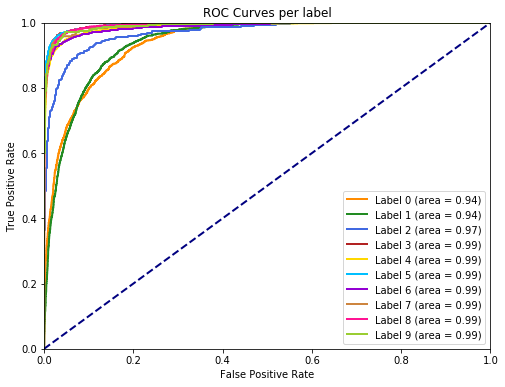

In [5]:
# LOGISTIC REGRESSION: 10-FOLD CROSS VALIDATION

model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial')
y_pred_cross = cross_val_predict(model_logistic, X_train, y_train, cv=10)

print(confusion_matrix(y_train, y_pred_cross))
print(classification_report(y_train, y_pred_cross))

y_pred_cross_proba = cross_val_predict(model_logistic, X_train, y_train, cv=10, method='predict_proba')

plot_roc_curves(y_train, y_pred_cross_proba)

[[263 133   6   9   2   2  14   0  14   7]
 [106 439   6  23  11  18  15   2   6   4]
 [ 14  39  81   3   4   0   7   1   1   0]
 [  4  10   0 363  30   1   1   2   4   5]
 [  3   5   2  28 589  28   2  12  19   2]
 [  5   9   2   4  54 636   5   0   5   0]
 [ 17  21   1   0   0   0 224   0   3   4]
 [  0   0   0   2   0   0   0  58   0   0]
 [ 11  22  11  22  30  23   2   4 554  11]
 [  1  14   0   0   0   1   6   2  13  53]]
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       450
           1       0.63      0.70      0.66       630
           2       0.74      0.54      0.63       150
           3       0.80      0.86      0.83       420
           4       0.82      0.85      0.84       690
           5       0.90      0.88      0.89       720
           6       0.81      0.83      0.82       270
           7       0.72      0.97      0.82        60
           8       0.89      0.80      0.85       690
           9       0.62     

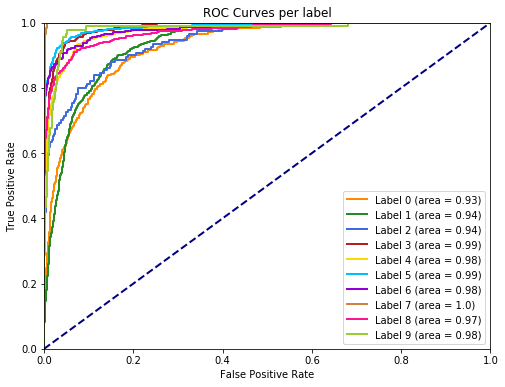

In [6]:
# LOGISTIC REGRESSION: TRAINING & TESTING DATA SETS

model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial')
y_pred_logistic = model_logistic.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

y_pred_logistic_proba = model_logistic.predict_proba(X_test)

plot_roc_curves(y_test, y_pred_logistic_proba)

[[ 526  249   16   24    8    4   31    3   25   10]
 [ 200  851   27   41   16   27   30    3   29   11]
 [  18   71  165    4    7    1   12    4    8    0]
 [   4   20    0  744   44    2    3    2   13    4]
 [   8   17    4   42 1168   59    1    9   24    7]
 [   7    8    2    4   77 1268   10    0   10    4]
 [  26   30    0    5    0    1  433    0    6    4]
 [   3    0    2   10    5    0    6  104    2    3]
 [  16   27   23   27   37   23    9   10 1162   14]
 [   4   14    2    1    1    2   14    6   12  140]]
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       896
           1       0.66      0.69      0.67      1235
           2       0.68      0.57      0.62       290
           3       0.82      0.89      0.86       836
           4       0.86      0.87      0.86      1339
           5       0.91      0.91      0.91      1390
           6       0.79      0.86      0.82       505
           7       0.74      0.77   

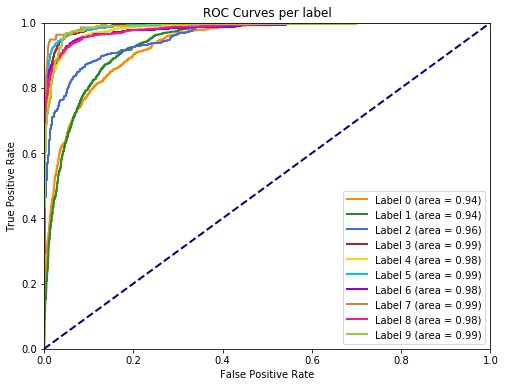

In [7]:
# LOGISTIC REGRESSION: TRAINING & TESTING DATA SETS (4000 TRAINING -> TESTING)

model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial')
y_pred_logistic = model_logistic.fit(X_train_4000, y_train_4000).predict(X_test_4000)

print(confusion_matrix(y_test_4000, y_pred_logistic))
print(classification_report(y_test_4000, y_pred_logistic))

y_pred_logistic_proba = model_logistic.predict_proba(X_test_4000)

plot_roc_curves(y_test_4000, y_pred_logistic_proba)

[[ 826  418   29   23   17   12   46    7   45   16]
 [ 339 1286   67   33   37   44   57    7   52   10]
 [  30  117  249    4   11    2   16    6   18    2]
 [  15   38    3 1157   82    5   16    4   27    2]
 [   5   35    7   62 1871  106    5   14   50    8]
 [  23   13    6   14  139 2052   15    3   12    2]
 [  37   70    4    9    0    2  678    0   11    8]
 [   2    3    6   12   21    7   20  146   11    7]
 [  24   31   50   32   59   35   15    9 1908    9]
 [  12   15    6   29    0   13   17   11   19  205]]
              precision    recall  f1-score   support

           0       0.63      0.57      0.60      1439
           1       0.63      0.67      0.65      1932
           2       0.58      0.55      0.56       455
           3       0.84      0.86      0.85      1349
           4       0.84      0.87      0.85      2163
           5       0.90      0.90      0.90      2279
           6       0.77      0.83      0.80       819
           7       0.71      0.62   

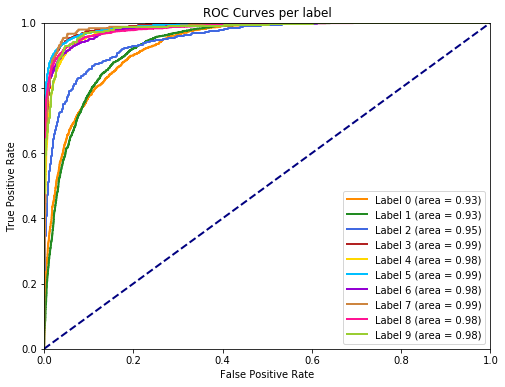

In [8]:
# LOGISTIC REGRESSION: TRAINING & TESTING DATA SETS (9000 TRAINING -> TESTING)

model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial')
y_pred_logistic = model_logistic.fit(X_train_9000, y_train_9000).predict(X_test_9000)

print(confusion_matrix(y_test_9000, y_pred_logistic))
print(classification_report(y_test_9000, y_pred_logistic))

y_pred_logistic_proba = model_logistic.predict_proba(X_test_9000)

plot_roc_curves(y_test_9000, y_pred_logistic_proba)